In [2]:
import numpy as np
import csv
import pandas as pd
from Bio import pairwise2
from Bio import SeqIO

import matplotlib.pyplot as plt
from collections import Counter

In [3]:
def lengthDistribution(df,title):
    fig = plt.figure()
    ax = fig.gca()
    pd.Series(df['length']).hist(color='blue', bins=200, ax=ax)
    plt.ylabel('Num of Seq with this length ')
    plt.xlabel('Length of Seq')
    plt.title(title)

def plotCharDistribution(dict_counts, char_totalsize, title):
    fig = plt.figure()
    fig.suptitle(title, fontsize=20)
    ax = fig.add_subplot(111)
    # The bar chart, with letters along the horizontal axis and the calculated
    # letter frequencies as percentages as the bar height
    x = range(len(dict_counts))
    letters =  dict_counts.keys()
    ax.bar(x, [val / char_totalsize * 100 for key,val in dict_counts.items()], width=0.8,
        color='g', alpha=0.5, align='center')
    ax.set_xticks(x)
    ax.set_xticklabels(letters)
    ax.tick_params(axis='x', direction='out')
    ax.set_xlim(-0.5, 25.5)
    ax.yaxis.grid(True)
    ax.set_ylabel('Letter frequency, %')

def countProtien(df, title):
    # count Sequence 
    records = df['Sequence']
    print("Count Records:", len(records))
    # countAminoAcids
    counts = Counter()
    for index, row in df.iterrows():
        line= row['Sequence']
        counts.update(line.rstrip())
        total = float(sum(counts.values()))
    sorted_dict = {key: value for key, value in sorted(counts.items())}
    for key,val in sorted_dict.items():
        print("{}: {}, ({:.2%})".format(key,val, val / total))

    plotCharDistribution(sorted_dict, total, title)

# Exact Search

In [6]:
path = '../datasets/deduplicate/AMPS_NonAMPs.ready.csv'
df=pd.read_csv(path,sep=',',header=0,quoting=csv.QUOTE_ALL)
df

,ID,Sequence,length,class
0,EN92515250|C|B3FJD7|phage 201phi2-1 lysin,MAKKSVPLRKPAGSDGQGNIKVPGGPVVLDLGDFDDIFGPMESESP...,2337,0
1,EN54061055|C|F8SJ56|phage PhiPA3 lysin,MASKKTTLPKPKGINPQGSIVQLDLDDFDDLFDEDFGLPKKNSPYT...,2319,0
2,EN4815120|C|Q8SCY1|phage phiKZ lysin,MAKKVTLPKGQTGATGTTLGQAGNILDLSDVDDIFGDTPKAKKGSP...,2237,0
3,EN3016141|D|D2J8A7|bacteriocin,MAETIKGLRIDLSLKDMGVGRSITELKRSFRTLNSDLKVSSKNFEY...,1619,0
4,EN9175723|BD|Q93IM3|bacteriocin,MAKKKNTYKVPSIIALTLAGTALTTHHAQAADKTQDQSTNKNILND...,1564,0
...,...,...,...,...
41946,UniRef50_B2ABU5 Podospora anserina S mat+ geno...,MKWKAIIAAYGM,12,1
41947,UniRef50_A0A151HEL5 Zinc finger C3HC4 type (R...,GLYFRPRRRASS,12,1
41948,UniRef50_K2MU79 Retrotransposon hot spot (RHS)...,MESNPMTLVGCG,12,1
41949,UniRef50_A0A1E1IUT2 Flagellar calcium-binding ...,IRCVGHWMQAEH,12,1


In [4]:
df['Sequence'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
42440    False
42441    False
42442    False
42443    False
42444     True
Name: Sequence, Length: 42445, dtype: bool

In [5]:
dups = df[df['Sequence'].duplicated()]
dups

,ID,Sequence,length,class
21782,UniRef50_P62975 Ubiquitin n=51 Tax=root TaxID=...,MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFA...,76,1
22441,UniRef50_P62581 Caeridin-1.4 n=43 Tax=Opisthok...,GLLDGLLGGLGL,12,1
22831,UniRef50_P59259 Histone H4 n=223 Tax=cellular ...,MSGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKR...,103,1
23149,UniRef50_P62805 Histone H4 n=1661 Tax=cellular...,MSGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKR...,103,1
24669,UniRef50_P86282 Phylloseptin Bu-1 n=2 Tax=Tetr...,FLISIPYSASIGGTATLTGTA,21,1
...,...,...,...,...
41815,UniRef50_P42989 Substance P-like peptide 1 n=1...,QPNPDEFFGLM,11,1
41816,UniRef50_P42990 Substance P-like peptide 2 n=1...,QPNPNEFFGLM,11,1
41820,UniRef50_P08615 Physalaemin n=1 Tax=Physalaemu...,QADPNKFYGLM,11,1
42317,UniRef50_P62117 50S ribosomal protein L36 chl...,MKIRASVRKICEKCRLIRRRGRIIVICSNPRHKQRQG,37,1


# Fix Records

Deduplicate

In [6]:
df.drop_duplicates(subset=['Sequence'],inplace=True)
df

,ID,Sequence,length,class
0,EN92515250|C|B3FJD7|phage 201phi2-1 lysin,MAKKSVPLRKPAGSDGQGNIKVPGGPVVLDLGDFDDIFGPMESESP...,2337,0
1,EN54061055|C|F8SJ56|phage PhiPA3 lysin,MASKKTTLPKPKGINPQGSIVQLDLDDFDDLFDEDFGLPKKNSPYT...,2319,0
2,EN4815120|C|Q8SCY1|phage phiKZ lysin,MAKKVTLPKGQTGATGTTLGQAGNILDLSDVDDIFGDTPKAKKGSP...,2237,0
3,EN3016141|D|D2J8A7|bacteriocin,MAETIKGLRIDLSLKDMGVGRSITELKRSFRTLNSDLKVSSKNFEY...,1619,0
4,EN9175723|BD|Q93IM3|bacteriocin,MAKKKNTYKVPSIIALTLAGTALTTHHAQAADKTQDQSTNKNILND...,1564,0
...,...,...,...,...
42439,UniRef50_B2ABU5 Podospora anserina S mat+ geno...,MKWKAIIAAYGM,12,1
42440,UniRef50_A0A151HEL5 Zinc finger C3HC4 type (R...,GLYFRPRRRASS,12,1
42441,UniRef50_K2MU79 Retrotransposon hot spot (RHS)...,MESNPMTLVGCG,12,1
42442,UniRef50_A0A1E1IUT2 Flagellar calcium-binding ...,IRCVGHWMQAEH,12,1


In [13]:
df.to_csv("../datasets/deduplicate/AMPS_NonAMPs.ready.csv",sep=",", quotechar='"',index=False, quoting=csv.QUOTE_ALL)

## NonAMPs Only

In [9]:
NonAMPs_df = df[df["class"] == 1]
NonAMPs_df

,ID,Sequence,length,class
21226,UniRef50_A0A672ZWI7 Ig-like domain-containing ...,MVIHQRHTSDESFSSSPVEIRITAATPIPELAEERSAEKPPAVTET...,189,1
21227,UniRef50_A0A3Q2PZR6 Uncharacterized protein n=...,MSTQAPTFTQPLQSVVALEGSAATFEAQVSGSPVPEVSWFRDGQVL...,295,1
21228,UniRef50_V9IMB4 Titin n=21 Tax=Apis TaxID=7459...,MWMEVGRVNADTQKLNIRDLQENHMYLIRIFAKNEVGLSDPLESDE...,121,1
21229,UniRef50_B4IRR3 GL21409 (Fragment) n=18 Tax=Dr...,IIHPLEDVSVTKGENAIFELELSKGDALVKWFKNGKELVFNDRVQL...,320,1
21230,UniRef50_UPI00083D1E21 titin-like n=26 Tax=Apo...,HDFGIVILDILYCYEENSGVYECRAFNKYGEDTTKATLKCFSKASL...,65,1
...,...,...,...,...
41946,UniRef50_B2ABU5 Podospora anserina S mat+ geno...,MKWKAIIAAYGM,12,1
41947,UniRef50_A0A151HEL5 Zinc finger C3HC4 type (R...,GLYFRPRRRASS,12,1
41948,UniRef50_K2MU79 Retrotransposon hot spot (RHS)...,MESNPMTLVGCG,12,1
41949,UniRef50_A0A1E1IUT2 Flagellar calcium-binding ...,IRCVGHWMQAEH,12,1


Count Records: 20725
A: 96580, (7.58%)
B: 12, (0.00%)
C: 24057, (1.89%)
D: 67814, (5.32%)
E: 79808, (6.26%)
F: 46782, (3.67%)
G: 86580, (6.79%)
H: 29437, (2.31%)
I: 65922, (5.17%)
K: 73834, (5.79%)
L: 116169, (9.11%)
M: 37276, (2.92%)
N: 55393, (4.35%)
P: 62403, (4.90%)
Q: 51729, (4.06%)
R: 72201, (5.66%)
S: 99277, (7.79%)
T: 76551, (6.01%)
V: 80353, (6.30%)
W: 15322, (1.20%)
X: 771, (0.06%)
Y: 36494, (2.86%)
Z: 6, (0.00%)


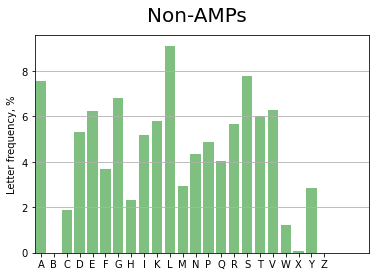

In [9]:
countProtien(NonAMPs_df,"Non-AMPs")

## Plot

In [14]:
Old_readyfile = pd.read_csv("../datasets/AMPS_NonAMPs.ready.csv",sep=',',header=0,quoting=csv.QUOTE_ALL)
new_readyfile = pd.read_csv("../datasets/deduplicate/AMPS_NonAMPs.ready.csv",sep=',',header=0,quoting=csv.QUOTE_ALL)

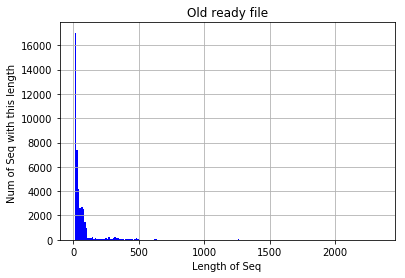

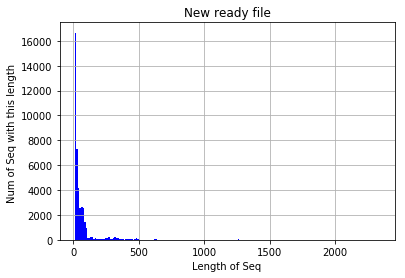

In [20]:
lengthDistribution(Old_readyfile,"Old ready file")
lengthDistribution(new_readyfile,"New ready file")

Count Records: 42445
A: 196016, (7.63%)
B: 32, (0.00%)
C: 68449, (2.67%)
D: 120802, (4.70%)
E: 137765, (5.36%)
F: 95280, (3.71%)
G: 196886, (7.67%)
H: 53953, (2.10%)
I: 135815, (5.29%)
J: 73, (0.00%)
K: 187362, (7.30%)
L: 221472, (8.62%)
M: 60134, (2.34%)
N: 119257, (4.64%)
O: 105, (0.00%)
P: 116950, (4.55%)
Q: 97789, (3.81%)
R: 144702, (5.63%)
S: 179948, (7.01%)
T: 146250, (5.69%)
U: 6, (0.00%)
V: 159652, (6.22%)
W: 41184, (1.60%)
X: 4088, (0.16%)
Y: 84121, (3.28%)
Z: 48, (0.00%)


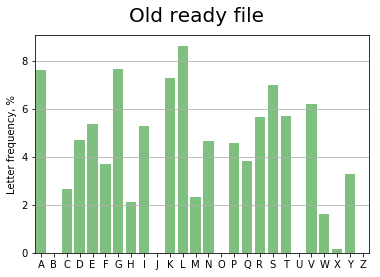

In [21]:
countProtien(Old_readyfile,"Old ready file")


## AMPs

In [7]:
AMPs_df = df[df["class"] == 0]
AMPs_df

,ID,Sequence,length,class
0,EN92515250|C|B3FJD7|phage 201phi2-1 lysin,MAKKSVPLRKPAGSDGQGNIKVPGGPVVLDLGDFDDIFGPMESESP...,2337,0
1,EN54061055|C|F8SJ56|phage PhiPA3 lysin,MASKKTTLPKPKGINPQGSIVQLDLDDFDDLFDEDFGLPKKNSPYT...,2319,0
2,EN4815120|C|Q8SCY1|phage phiKZ lysin,MAKKVTLPKGQTGATGTTLGQAGNILDLSDVDDIFGDTPKAKKGSP...,2237,0
3,EN3016141|D|D2J8A7|bacteriocin,MAETIKGLRIDLSLKDMGVGRSITELKRSFRTLNSDLKVSSKNFEY...,1619,0
4,EN9175723|BD|Q93IM3|bacteriocin,MAKKKNTYKVPSIIALTLAGTALTTHHAQAADKTQDQSTNKNILND...,1564,0
...,...,...,...,...
21221,LFB0114|milkampdb,KKWQWRMKKLG,11,0
21222,"CAA0039,CAA0041,CAA0040|milkampdb",LRLKKYNVPQL,11,0
21223,LFB0117|milkampdb,RRAAARAKKAG,11,0
21224,LFB0115|milkampdb,RRWQRWMKKLG,11,0


Count Records: 21226
A: 98654, (7.68%)
B: 20, (0.00%)
C: 44171, (3.44%)
D: 52677, (4.10%)
E: 57690, (4.49%)
F: 48055, (3.74%)
G: 109341, (8.51%)
H: 24361, (1.90%)
I: 69185, (5.39%)
J: 73, (0.01%)
K: 112602, (8.77%)
L: 104187, (8.11%)
M: 22701, (1.77%)
N: 63546, (4.95%)
O: 105, (0.01%)
P: 54034, (4.21%)
Q: 45787, (3.57%)
R: 72116, (5.62%)
S: 80188, (6.24%)
T: 69394, (5.40%)
U: 6, (0.00%)
V: 78687, (6.13%)
W: 25760, (2.01%)
X: 3269, (0.25%)
Y: 47457, (3.70%)
Z: 42, (0.00%)


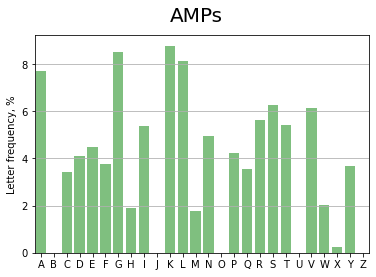

In [8]:
countProtien(AMPs_df,"AMPs")

Count Records: 20725
A: 96580, (7.58%)
B: 12, (0.00%)
C: 24057, (1.89%)
D: 67814, (5.32%)
E: 79808, (6.26%)
F: 46782, (3.67%)
G: 86580, (6.79%)
H: 29437, (2.31%)
I: 65922, (5.17%)
K: 73834, (5.79%)
L: 116169, (9.11%)
M: 37276, (2.92%)
N: 55393, (4.35%)
P: 62403, (4.90%)
Q: 51729, (4.06%)
R: 72201, (5.66%)
S: 99277, (7.79%)
T: 76551, (6.01%)
V: 80353, (6.30%)
W: 15322, (1.20%)
X: 771, (0.06%)
Y: 36494, (2.86%)
Z: 6, (0.00%)


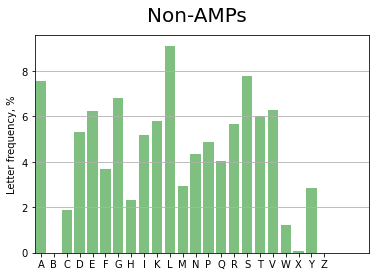

In [10]:
countProtien(NonAMPs_df,"Non-AMPs")

# Pairwaise

In [4]:
AMPsSeq = SeqIO.parse('amp_clustered100.22DBs.fasta', "fasta") 
NonAMPsSeq = SeqIO.parse('NonAMPs.ready.fasta', "fasta") 

In [ ]:
for record in AMPsSeq:
    print("%s - %s" % (record.seq, record.id))


In [ ]:
SARS_COV = pairwise2.align.globalxx(SARS.seq, COV2.seq, one_alignment_only=True, score_only=True)